# Load images from new Echelle

## Imports and Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os

In [2]:
# Don't know how to import locally, so I just use %run
%run ../tools/echelle.py

In [3]:
files_fujii = {
    "orders": "pattern_fujii.txt",
    "wavelength": "",
    "sphr": "LED.tif",
    "bkgr": "LED_bkg.tif",
    "integral": "integrating_sphere.txt",
}

In [4]:
%run ../tools/echelle.py
folder = '.'
crop = [1400,2600]
cb = Calibrations(folder,files_fujii,spec='fujii',dv=17,crop=crop)

In [5]:
cb.start_cut()

In [6]:
sphr = EchelleImage('LED.tif',clbr=cb,spec='fujii',crop=crop)
sphr.calculate_order_spectra()

In [7]:
h2 = EchelleImage('H2-lamp-Fulcher-1s--20C.tif',clbr=cb,spec='fujii',crop=crop)
h2.calculate_order_spectra()

In [8]:
subtract = [i.min() for i in h2.order_spectra[0]]

In [10]:
%matplotlib widget

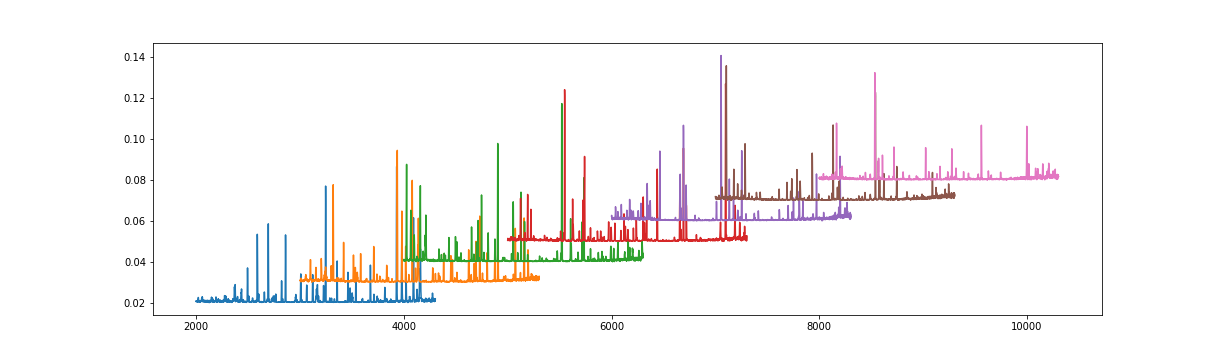

In [11]:
fig = plt.gcf()
fig.set_size_inches([17,5])
x = np.arange(cb.DIMW)

_ = [plt.plot(x+1000*i,(h2.order_spectra[0,i]-subtract[i])/sphr.order_spectra[0,i]+1e-2*i) for i in range(2,9)]